# Welcome to Our Analysis of Stack Overflow's 2020 Developer Survey

### It is our hope that the following information will provide additional insight into what developers around the world were thinking as Covid-19 began to make it's impact on the global economy.

The original data used in the following analysis may be found [HERE](https://insights.stackoverflow.com/survey/?_ga=2.206748819.1859624778.1609725307-1677851539.1609725307  "2020 StackOverflow Developer Survey Datasets")

We will be analyzing the data based on the CRISP-DM Model...Let's begin by reading in the data and looking at the first few rows.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

#Read in 2020 StackOverflow Developer Survey
df_full = pd.read_csv('survey_results_public.csv').replace('None', np.nan)

df= df_full.copy()
total_respondents= df.shape[0]
print('The original data set includes {:,} respondents.\n\n'.format(total_respondents))
df.head()

The original data set includes 64,461 respondents.




,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


# Understanding the Business and the Data

### Taking a peep at the data, there are a number of questions we have that revolve around the topic of compensation.  Note- because of currently fluctuations all compensation is US Dollar denominated and based on the StackOverflow dataset 'ConvertedComp' column

1) What are average developer earnings based on country and how does this compare with the country's 2019 per capita GDP?
* Data Needed - StackOverflow Respondent earnings grouped by 'Country'and country per capita GDP taken from the IMF Datamapper [HERE](https://www.imf.org/external/datamapper/NGDPDPC@WEO/USA/GBR/ESP/NLD/DEU/CAN/BEL/BRA/FRA/ITA/POL/IDN/GRC/ISR/CZE/BGR/HUN/SWE/CHE/UKR/IND/MEX/NGA/ROU/PRT/FIN/AUT/AUS/TUR/IRL/EST/PHL/LKA/HRV/ARG/IRN/NOR/LTU/DNK/SRB/SVK/RUS/BGD/ZAF/COL/CHL/CHN/NZL/SGP/VNM/MYS/JPN "IMF GDP Per Capita current prices US Dollars")  and based on the information provided by the  World Economic Outlook for October 2020 for GDP, for the year 2019.

2) At what age did most developers begin coding?
* Data Needed - StackOverflow Respondent 'Age1stCode'

3) What was the gender breakdown for all surveyors and do disparities in income still exist for people in the US?
* Data Needed - StackOverflow Respondent earnings grouped by 'Gender' and 'DevType' and 'Country'

4) What do developers do when they get 'stuck' on a problem and does it change with compensation?
* Data Needed - StackOverflow Respondent earnings grouped by 'NEWStuck' and 'YearsCodePro' 

5) What were the top 10 professions based on average compensation of each profession?
* Data Needed - StackOverflow Respondent earnings grouped by 'DevType' 

6) What features in the dataset are strong predictors of high compensation levels?
* Data Needed - Regression model of StackOverflow Respondent 'Comp_gdp' as target and features. 
* features = ['Hobbyist', 'Age1stCode','Age', 'Country','DevType','Gender', 'JobSat','YearsCodePro','OrgSize', 'ConvertedComp']

### Given compensation is key to all questions, let's prepare the data set by dropping rows  where 'ConvertedComp' is  NaN

In [2]:
#Drop rows where ConvertedComp is NaN
df = df.dropna(subset=['ConvertedComp'])
reported_comp =df.shape[0]
print('Dropping rows that do not contain ConvertedComp information, reduced the dataset to {:,} or {:.1%} '
      'of all respondents in the original dataset'.format(reported_comp, reported_comp/total_respondents))

Dropping rows that do not contain ConvertedComp information, reduced the dataset to 34,756 or 53.9% of all respondents in the original dataset


## 1) What are average developer earnings based on country and how does this compare with the country's 2019 per capita GDP?

1) When grouped by country, a small number of respondents is hardly representative, so we will set a minimum benchmark to only include countries with 100 or more survey respondents (sorry Burkina Faso).

2) Let's read in the GDP data from the IMF for the year 2019.

In [3]:
#Drop rows for countries with < 100 respondents
#Dictionary of Country value Counts
all_countries=df['Country'].value_counts().to_dict() 
                 
#List of Countries with < 100 Respondents    
low_count_countries = [country for country in all_countries if all_countries[country]<100]

#Drop Low Count Countries from dataframe
for country in low_count_countries:
    df = df.drop(df[(df['Country']== country)].index)

print('We will be analyzing {:,} respondants from {} countries which had more that 100 survey respondents.\n\n '
      .format(df.shape[0], df.Country.nunique()))
#All of the Countries included in the dataset
df.Country.unique()

We will be analyzing 32,667 respondants from 53 countries which had more that 100 survey respondents.

 


array(['United States', 'United Kingdom', 'Spain', 'Netherlands',
       'Germany', 'Canada', 'Belgium', 'Italy', 'Brazil', 'France',
       'Poland', 'Indonesia', 'Greece', 'Israel', 'Czech Republic',
       'Bulgaria', 'Sweden', 'India', 'Ukraine', 'Switzerland', 'Hungary',
       'Romania', 'Portugal', 'Mexico', 'Nigeria', 'Finland', 'Austria',
       'Turkey', 'Ireland', 'Estonia', 'Philippines', 'Australia',
       'Sri Lanka', 'Croatia', 'Argentina', 'Iran', 'Norway', 'Pakistan',
       'Lithuania', 'Denmark', 'Serbia', 'Bangladesh', 'Slovakia',
       'Russian Federation', 'South Africa', 'Chile', 'Colombia',
       'New Zealand', 'Singapore', 'Viet Nam', 'China', 'Japan',
       'Malaysia'], dtype=object)

In [4]:
#No 2019 IMF data for Pakistan - so drop them from the working dataset (sorry Pakistan)
df.drop(df[(df['Country']== 'Pakistan')].index)

#Slovakia listed as Slovak Republic, China listed as China, People's Republic, and Viet Nam listed as Vietnam.
#The original dataset was edited to align these names with the survey data

#Read in IMF GDP per capita data
IMF_gdp= pd.read_csv('imf_data.csv', header=1)
IMF=IMF_gdp.dropna()

#Rename column and index 
IMF = IMF.rename(columns ={'2019': '2019 GDP', 
                           'GDP per capita, current prices\n (U.S. dollars per capita)': 'Country'})

IMF.head().style.format({'2019 GDP':'${:20,.0f}'})


,Country,2019 GDP
1,Argentina,"$ 9,890"
2,Australia,"$ 54,348"
3,Austria,"$ 50,380"
4,Bangladesh,"$ 1,816"
5,Belgium,"$ 46,237"


In [5]:
#Calculate Countries by Mean. Median Converted Compensation and proportion of GDP
countries_comp= df.groupby('Country')['ConvertedComp'].agg(['mean', 'median',])

#Join IMF dataset to the countries_comp dataset
cty_comp_IMF =countries_comp.join(IMF.set_index('Country'), on='Country')

#Create column for Compensation as a proportion of GDP
gdp_proportion = (cty_comp_IMF['mean'])/(cty_comp_IMF['2019 GDP'])

cty_comp_IMF['Mean as % of GDP']= gdp_proportion

print("Table of Where Being a Developer Give you the Most Bang for your Buck! \n\n(Minimum values are in red boxes and maximum values are in green boxes)")
#Table of Where Being a Developer Give you the Most Bang for your Buck! 
(cty_comp_IMF.style.format({'mean':'${0:,.0f}', 
                            'median':'${0:,.0f}', 
                            '2019 GDP':'${0:,.0f}',
                            'Mean as % of GDP':'{:.1%}'})
                             .highlight_max(color='mediumaquamarine')
                             .highlight_min(color='indianred')
                             .bar(subset=['Mean as % of GDP'], color='teal'))



Table of Where Being a Developer Give you the Most Bang for your Buck! 

(Minimum values are in red boxes and maximum values are in green boxes)


,mean,median,2019 GDP,Mean as % of GDP
Country,,,,
Argentina,"$29,010","$17,520","$9,890",293.3%
Australia,"$146,166","$76,831","$54,348",268.9%
Austria,"$83,078","$51,888","$50,380",164.9%
Bangladesh,"$21,587","$7,068","$1,816",1188.7%
Belgium,"$77,265","$45,396","$46,237",167.1%
Brazil,"$24,941","$17,184","$8,751",285.0%
Bulgaria,"$33,285","$29,832","$9,772",340.6%
Canada,"$115,102","$68,068","$46,272",248.8%
Chile,"$28,403","$22,584","$14,772",192.3%


### Top Ten Places to live as a developer by proportion of Compensation to the national per capita gdp

In [70]:
cty_comp_IMF.sort_values(by=['Mean as % of GDP'], ascending = False).head(10).style.format({'mean':'${0:,.0f}', 
                            'median':'${0:,.0f}', 
                            '2019 GDP':'${0:,.0f}',
                            'Mean as % of GDP':'{:.1%}'})\
                            .bar(subset=['Mean as % of GDP'], color='teal')

,mean,median,2019 GDP,Mean as % of GDP
Country,,,,
India,"$28,751","$10,056","$2,098",1370.6%
Bangladesh,"$21,587","$7,068","$1,816",1188.7%
Nigeria,"$22,399","$6,588","$2,230",1004.5%
Ukraine,"$35,290","$30,000","$3,707",952.0%
South Africa,"$54,480","$37,494","$5,978",911.3%
Viet Nam,"$28,343","$10,344","$3,416",829.6%
China,"$61,494","$35,862","$10,287",597.8%
Serbia,"$41,516","$27,528","$7,382",562.4%
Colombia,"$32,387","$17,652","$6,423",504.2%


### Top Ten Places to live by ConvertedComp

In [73]:
cty_comp_IMF.sort_values(by=['mean'], ascending = False).head(10).style.format({'mean':'${0:,.0f}', 
                            'median':'${0:,.0f}', 
                            '2019 GDP':'${0:,.0f}',
                            'Mean as % of GDP':'{:.1%}'})\
                            .bar(subset=['mean'], color='darkkhaki')

,mean,median,2019 GDP,Mean as % of GDP
Country,,,,
United States,"$208,826","$115,000","$65,254",320.0%
Ireland,"$183,001","$75,669","$80,504",227.3%
Australia,"$146,166","$76,831","$54,348",268.9%
Norway,"$143,368","$80,922","$75,294",190.4%
Switzerland,"$142,002","$98,599","$82,484",172.2%
United Kingdom,"$140,849","$67,215","$42,379",332.4%
New Zealand,"$140,843","$63,890","$41,667",338.0%
Canada,"$115,102","$68,068","$46,272",248.8%
Israel,"$111,651","$98,064","$43,603",256.1%


## 2) At what age did most developers begin coding?


Most Developers began coding at the age of 15 years. But the youngest age was 5 years old and the oldest was 50 years old.


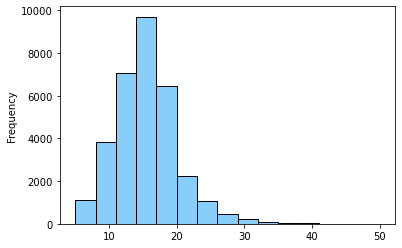

In [6]:
#Determine outliers in Age1stCode and remove rows
df['Age1stCode'].value_counts()

code1st_outliers= ['85', 'Younger than 5 years', 'Older than 85']

for outlier in code1st_outliers:
    df = df.drop(df[(df['Age1stCode']== outlier)].index)

#Convert df['Age1stCode'] to numeric dtype
df['Age1stCode'] = pd.to_numeric(df['Age1stCode'], errors='coerce')


print('Most Developers began coding at the age of {:.0f} years. But the youngest age was {:.0f} years old and the oldest \
was {:.0f} years old.'.format(df['Age1stCode'].mean(),min(df['Age1stCode']),max(df['Age1stCode'])))

#Print Historgram of Age1stCode
df['Age1stCode'].plot(kind = "hist", bins = 15, color='lightskyblue', edgecolor='black');


### - Does the age of first starting to code significantly effect future compensation?

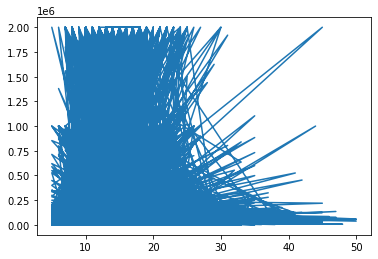

In [76]:
plt.plot(df.Age1stCode, df.ConvertedComp);

##  3) What was the gender breakdown for all survey respondents and do disparities in income still exist for people in the US?

In [82]:
#Proportion of Respondents by Gender
df_gender=pd.DataFrame((df['Gender'].value_counts()/df['Gender'].count()))
df_gender.style.format('{:.1%}')

,Gender
Man,91.6%
Woman,7.1%
"Non-binary, genderqueer, or gender non-conforming",0.8%
"Man;Non-binary, genderqueer, or gender non-conforming",0.3%
"Woman;Non-binary, genderqueer, or gender non-conforming",0.2%
Woman;Man,0.1%
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",0.0%


In [85]:
#Average, median income of respondents by gender and % of mean for 'Men'
gender_brkdown= df.groupby('Gender')['ConvertedComp'].agg(['mean'])
gender_brkdown['pct of \'man\' mean']= gender_brkdown['mean']/gender_brkdown['mean']['Man']

#Table of gender_brkdown
gender_brkdown.sort_values(by='mean', ascending=False).style.format({
    'mean':'${0:,.0f}',
    'median':'${0:,.0f}', 
    'pct of \'man\' mean': '{:.1%}'})\
    .highlight_min(color='salmon')\
    .highlight_max(color='lightseagreen')

,mean,pct of 'man' mean
Gender,,
Man,"$107,629",100.0%
"Non-binary, genderqueer, or gender non-conforming","$105,178",97.7%
Woman,"$101,086",93.9%
"Woman;Non-binary, genderqueer, or gender non-conforming","$90,890",84.4%
"Man;Non-binary, genderqueer, or gender non-conforming","$89,199",82.9%
Woman;Man,"$81,694",75.9%
"Woman;Man;Non-binary, genderqueer, or gender non-conforming","$75,772",70.4%


## 3) (Part 2) - Is there a change in the chart above when looking at just US statistics?

In [87]:
#US only data
US_df = df[df['Country']=='United States']
           
#Average income of respondents by gender in US
gender_brkdown_US= US_df.groupby('Gender')['ConvertedComp'].agg(['mean'])
gender_brkdown_US['pct of \'man\' mean']= gender_brkdown_US['mean']/gender_brkdown_US['mean']['Man']

gender_brkdown_US.sort_values(by='mean', ascending=False).style.format({
    'mean':'${0:,.0f}',
    'median':'${0:,.0f}', 
    'pct of \'man\' mean': '{:.1%}'}).highlight_max(color='lightseagreen').highlight_min(color='salmon')

,mean,pct of 'man' mean
Gender,,
Man,"$212,421",100.0%
Woman,"$168,681",79.4%
"Non-binary, genderqueer, or gender non-conforming","$160,429",75.5%
"Woman;Man;Non-binary, genderqueer, or gender non-conforming","$154,375",72.7%
"Woman;Non-binary, genderqueer, or gender non-conforming","$139,526",65.7%
"Man;Non-binary, genderqueer, or gender non-conforming","$104,228",49.1%
Woman;Man,"$74,833",35.2%


## 4) What do developers do when they get 'stuck' on a problem .....




You're Stuck! - What Now?


,Percentage
Visit Stack Overflow,26.5%
Do other work and come back later,16.8%
Call a coworker or friend,16.6%
Watch help / tutorial videos,14.0%
Go for a walk or other physical activity,13.6%
Play games,3.5%
Meditate,3.3%
Panic,3.0%
Visit another developer community (please name):,2.7%


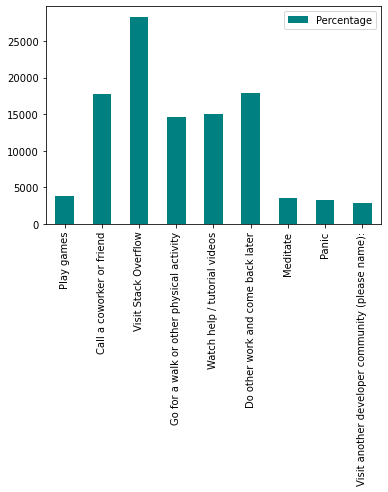

In [91]:
#list of unique values in ['NEWStuck']  
stuck_responses=[str(df['NEWStuck'][item]).split(';') for item in (df['NEWStuck'].index) if 
                          (df['NEWStuck'][item] != 'nan')]
stuck_values=[]
for responses in stuck_responses:
    for response in responses:
        stuck_values.append(response)

#Count of ['NEWStuck'] unique values
stuck_value_dict ={}

for value in stuck_values:
    if value not in stuck_value_dict:
        stuck_value_dict[value] =stuck_values.count(value)

#Convert Dictionary to DataFrame
stuck_value_counts=pd.DataFrame.from_dict(stuck_value_dict, orient='index', columns=['Percentage'])    
stuck_value_counts = stuck_value_counts.drop(index='nan')
stuck= pd.DataFrame(((stuck_value_counts/stuck_value_counts.sum()).sort_values(by='Percentage', ascending=False)))

#Bar Chart of Stuck_Value_Counts
print('\n\n\nYou\'re Stuck! - What Now?')
stuck_value_counts.plot.bar(color='teal');
stuck.style.format('{:.1%}')

## ....Does it change with compensation or years of coding?

In [97]:
stuck_comp= pd.DataFrame()
stuck_comp['Compensation']= df['ConvertedComp']
stuck_comp['NEWStuck']=df['NEWStuck']
stuck_comp['YearsCoding']=df['YearsCodePro']
stuck_comp = stuck_comp.dropna(subset=['NEWStuck'])

stuck_comp=stuck_comp.loc[stuck_comp['NEWStuck'].isin(stuck_values)]


                  
stuck_comp.groupby('NEWStuck').agg(['mean']).sort_values(by=[('Compensation', 'mean')], ascending=False).style.format('{0:,.0f}')

,Compensation,YearsCoding
,mean,mean
NEWStuck,,
Visit another developer community (please name):,"190,731",13
Panic,"161,267",11
Do other work and come back later,"144,803",11
Watch help / tutorial videos,"118,604",9
Call a coworker or friend,"109,729",9
Go for a walk or other physical activity,"104,016",9
Visit Stack Overflow,"87,835",10
Play games,"56,503",6


In [12]:
df['YearsCodePro'].value_counts()

#Remove "More than 50 years" Responses
CodePro_remove_list = ['More than 50 years']

for outlier in CodePro_remove_list:
    df = df.drop(df[(df['YearsCodePro']== outlier)].index)

#Replace "Less than 1 year" Responses with '.5'
df['YearsCodePro'].replace('Less that 1 year', '0.5')

#Convert df['Age1stCode'] to numeric dtype
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

print('Average years coding professionally: {:,.1f} years.'.format(df['YearsCodePro'].mean()))


Average years coding professionally: 9.0 years.


### 5) What were the top 10 professions based on average compensation of each profession?

In [35]:
#Include only those DevType responses with more than 50 responses
dev_counts=df_new.DevType.value_counts()
dev_type_limit=pd.DataFrame(dev_counts[dev_counts >=50]).reset_index()

#Rename columns appropriately
dev_type_limit=dev_type_limit.rename(columns={'index': 'DevType', 'DevType': 'Count'})


DevType_stats=df_new.groupby('DevType')['ConvertedComp', 'Comp_gdp'].agg(['mean'])

#Table of ConvertedComp mean and median based on DevTypes with more than 50 respondents 
ConvertedComp_by_DevType = dev_type_limit.merge(DevType_stats, on='DevType')
                    
print('The table below reflects the ConvertedComp and ConvertedComp to GDP ratio (Comp_gdp) of {:,.0f} developers \
who had a DevType profession in which 50 or more people reported the same DevType \n Minimum values are in gray boxes and maximum values are in green '\
      .format(dev_type_limit.Count.sum()))

#Dataframe grouped by DevType comparing ConvertedComp and Comp_gdp (compensation as a proportion of country specific gdp)
ConvertedComp_by_DevType\
.style.format({('Comp_gdp', 'mean'): '{:.1%}', ('ConvertedComp', 'mean'): '${:,.0f}'})\
.highlight_min(color = 'indianred')\
.highlight_max(color ='mediumaquamarine')\
.bar(subset=[('Comp_gdp', 'mean')], color='teal')

The table below reflects the ConvertedComp and ConvertedComp to GDP ratio (Comp_gdp) of 18,090 developers who had a DevType profession in which 50 or more people reported the same DevType 
 Minimum values are in gray boxes and maximum values are in green 


<ipython-input-35-d4cca9783cee>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  DevType_stats=df_new.groupby('DevType')['ConvertedComp', 'Comp_gdp'].agg(['mean'])
/Users/karendiatta/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,DevType,Count,"('ConvertedComp', 'mean')","('Comp_gdp', 'mean')"
0,"Developer, full-stack",2974,"$107,201",358.1%
1,"Developer, back-end",2068,"$104,247",394.0%
2,"Developer, back-end;Developer, front-end;Developer, full-stack",1531,"$96,024",355.3%
3,"Developer, back-end;Developer, full-stack",1054,"$109,606",404.4%
4,"Developer, front-end",827,"$91,544",331.7%
5,"Developer, mobile",762,"$92,660",436.8%
6,"Developer, front-end;Developer, full-stack",608,"$123,900",372.7%
7,"Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack",566,"$96,204",378.6%
8,"Developer, back-end;Developer, desktop or enterprise applications",459,"$96,086",347.6%
9,"Developer, desktop or enterprise applications",410,"$105,374",331.3%


### What were the top 10 professions based on higest average compensation 

In [107]:
ConvertedComp_by_DevType.sort_values(by=[('ConvertedComp', 'mean')], ascending=False).head(10)\
                        .style.format({('ConvertedComp', 'mean'):'${:,.0f}', ('Comp_gdp', 'mean'): '{:.2f}'})

,DevType,Count,"('ConvertedComp', 'mean')","('Comp_gdp', 'mean')"
34,Engineering manager,105,"$174,532",7.23
65,"Data or business analyst;Developer, full-stack",50,"$172,757",3.73
46,"Developer, back-end;Engineering manager",76,"$167,549",9.34
64,"Designer;Developer, full-stack",50,"$166,225",3.53
63,"Database administrator;Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack",51,"$163,075",3.50
35,"Developer, full-stack;Engineering manager",102,"$160,689",5.01
31,DevOps specialist,114,"$148,534",4.58
16,"Developer, back-end;DevOps specialist",188,"$147,015",3.74
50,"Designer;Developer, front-end;Developer, full-stack",68,"$141,519",3.42
12,"Developer, embedded applications or devices",314,"$140,137",3.59


###  6) What features in the dataset are strong predictors of high compensation levels?

For the compensation conversation to be relevant we will join the IMF data to the dataset and define "high compensation' as earning 200% or more of GDP in the respondents' respective countries. This will be defined inthe 'Comp_gdp' column which has a range from 0-858 base on dividing "ConvertedComp" by the IMF 2019 per capita gdp of a respondent's country.

Let's do this first to begin to make some predictions.

In [33]:
#Reset Index of dataframe for iteration
df = df.reset_index(drop=True)

#Merge IMF data with dataset
df_new=pd.merge(df,IMF, on='Country')

#Create new column Comp_gdp which measures relative US denominated compensation based on Converted Compensation divided\
# by the respective national per capita GDP based on 2019 IMF data
df_new['Comp_gdp']= df_new['ConvertedComp']/df_new['2019 GDP']


In [14]:
df_new.describe()

,Respondent,Age,Age1stCode,CompTotal,ConvertedComp,WorkWeekHrs,YearsCodePro,2019 GDP,Comp_gdp
count,32151.000000,28432.000000,32071.000000,3.215100e+04,3.215100e+04,31191.000000,30707.000000,32151.000000,32151.000000
mean,29511.359336,32.332182,15.069627,3.110323e+145,1.083158e+05,40.837277,9.006025,39397.539423,3.828578
std,18679.931581,8.638666,4.722639,5.577027e+147,2.323043e+05,18.008218,7.667804,23623.862023,14.934237
min,8.000000,1.000000,5.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1816.035000,0.000000
25%,13649.500000,26.000000,12.000000,2.350000e+04,2.790400e+04,40.000000,3.000000,12887.060000,1.103389
50%,27321.000000,30.000000,15.000000,6.500000e+04,5.672300e+04,40.000000,6.000000,43603.013000,1.634497
75%,47375.500000,37.000000,18.000000,1.240000e+05,9.989400e+04,42.000000,12.000000,65253.518000,2.730912
max,65631.000000,279.000000,50.000000,1.000000e+150,2.000000e+06,475.000000,50.000000,82483.925000,858.049120



### Given the breadth of the StackOerflow Developer Survey, we have chosen to look at a subset of the  responses (features) to determine if they maybe strong predictors of high compensation levels.   However some of this data, such as 'DevType' should be cleaned up.


In [34]:
#Read in additional libraries for analysis and modeling

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import seaborn as sns

## Predictive model construction

In [39]:
#Dataset features to be analaysed
features = ['Hobbyist', 'Age1stCode','Age', 'Country','DevType','Gender', 'JobSat',
            'YearsCodePro','OrgSize', 'ConvertedComp']

#Set predictors
X = df_new[features]


#Create ['ConvertedComp'] as Target
y= df_new['Comp_gdp']

#Create Validation/Testing and Training Data
X_train,X_test, y_train, y_test = train_test_split(X,y, train_size =0.8, random_state=9)

#Check feature datatypes
print([(feature + ' - '+str(X[feature].dtype)) for feature in features])


['Hobbyist - object', 'Age1stCode - float64', 'Age - float64', 'Country - object', 'DevType - object', 'Gender - object', 'JobSat - object', 'YearsCodePro - float64', 'OrgSize - object', 'ConvertedComp - float64']


In [40]:
#Numerical Columns
num_cols = [nname for nname in X_train.columns if
           X_train[nname].dtype in ['int64','float64']]


#Categorical Columns with cardinality <60 to capture the country column 
cat_cols = [cname for cname in X_train.columns if
           X_train[cname].nunique() <60 and 
           X_train[cname].dtype == 'object']

#Keep Relevant Columns
my_cols = cat_cols+ num_cols

X_train = X_train[my_cols].copy()
X_test = X_test[my_cols].copy()

### For numeric data - Given the spead of the data particularly due to geographic differences mean seems an appropriate measure for imputation

### For categorical data -  Given the data tpye taking the mode ('most_frequent') value of a specific columns seems an appropriate measure for imputation

In [41]:
#Preprocess numerical data - Given the spead of the data particularly due to geographic differences mean seems an
# appropriate measure for imputation
num_transformer = SimpleImputer(strategy='mean')

#Preprocess categorical data - Given the spead of the data particularly due to geographic differences mean seems an
# appropriate measure for imputation
cat_transformer  = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                   ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#Bundle preprocessor for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[
                ('num', num_transformer, num_cols),
                ('cat', cat_transformer, cat_cols)])


In [42]:
#Model Definition
model = RandomForestRegressor(n_estimators = 1000, random_state= 9)

#Bundle Preprocess and Model
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model',model)])

#Fit and Predict
my_pipeline.fit(X_train, y_train)
prediction = my_pipeline.predict(X_test)

print("The r_square score is ", r2_score(y_test, prediction))

The r_square score is  0.9424618175355847
